In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_df=pd.read_csv('Summary_of_Weather.csv',low_memory=False)
weather_df.shape

(119040, 31)

In [3]:
weather_df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather=weather_df.loc[:,['STA','Date','MeanTemp']]

In [6]:
weather.head()

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444


In [7]:
weather['Date']=pd.to_datetime(weather['Date'])

In [8]:
weather.head()

,STA,Date,MeanTemp
0,10001,1942-07-01,23.888889
1,10001,1942-07-02,25.555556
2,10001,1942-07-03,24.444444
3,10001,1942-07-04,24.444444
4,10001,1942-07-05,24.444444


In [10]:
weather_bin=weather.loc[weather.STA==32907]
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


In [11]:
weather_bin.shape

(751, 3)

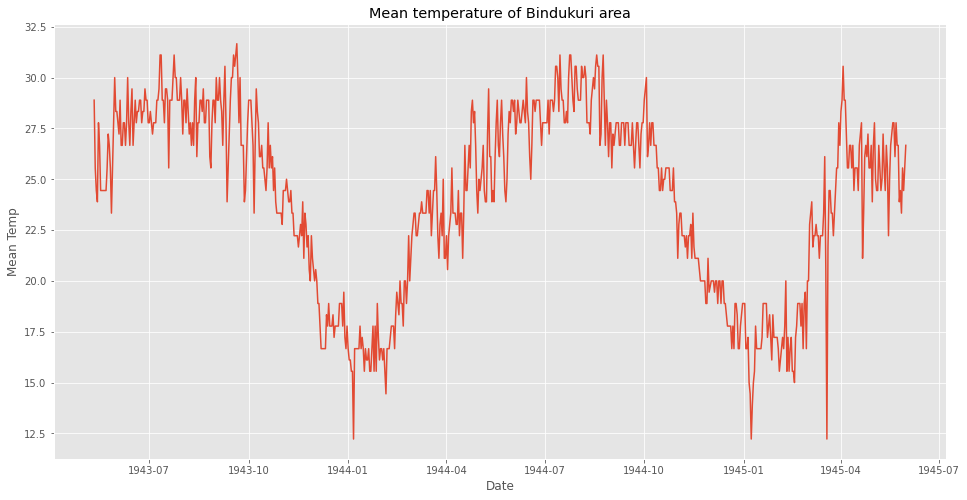

In [14]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(16,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title('Mean temperature of Bindukuri area')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller
def cal_adfuller(ts):
    result=adfuller(ts)
    print('test statistics:',result[0])
    print('P-value:',result[1])
    print('critical values:',result[4])
    
def plotting_rolling_stats(ts):
    rolmean=ts.rolling(6).mean()
    rolstd=ts.rolling(6).std()
    plt.figure(figsize=(16,8))
    orig=plt.plot(ts,color='r',label='original')
    mean=plt.plot(rolmean,color='black',label='Rolling Mean')
    std=plt.plot(rolstd,color='g',label='Rolling std')
    plt.title('Mean temperature of Bindukuri area')
    plt.xlabel('Date')
    plt.ylabel('Mean Temp')
    plt.show()
    
timeseries=weather_bin.loc[:,['Date','MeanTemp']]
timeseries.index=timeseries.Date
ts=timeseries.drop('Date',axis=1)                

    

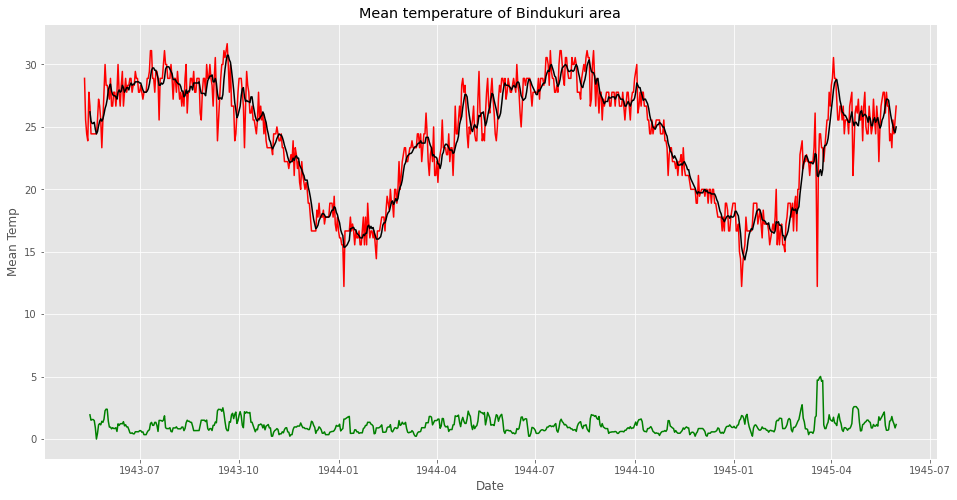

test statistics: -1.409596674588767
P-value: 0.5776668028526398
critical values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [21]:
plotting_rolling_stats(ts)
cal_adfuller(ts)

In [47]:
import pandas as pd
train=pd.read_csv('AirPassengers.csv')

In [48]:
train.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [50]:
train.Month=pd.to_datetime(train.Month)
train.index=train.Month

In [51]:
train.drop('Month',axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [52]:
train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [53]:
train=train.rename(columns={'#Passengers':'Passengers'})

In [54]:
train.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

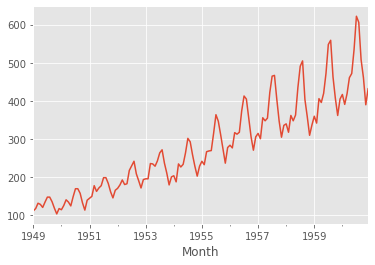

In [55]:
train['Passengers'].plot()

In [56]:
train['Passengers_diff']=train['Passengers']-train['Passengers'].shift(1)

<AxesSubplot:xlabel='Month'>

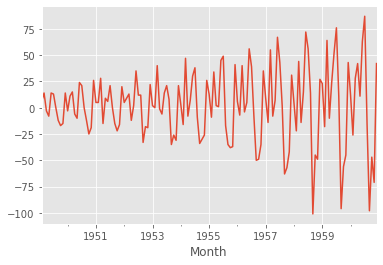

In [57]:
train['Passengers_diff'].dropna().plot()
#Differencing method

In [58]:
#Seasonal Differencing
n=7
train['pass_diff_2']=train['Passengers']-train['Passengers'].shift(n)

<AxesSubplot:xlabel='Month'>

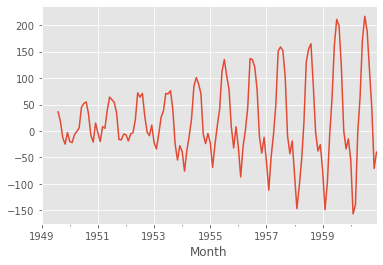

In [60]:
train['pass_diff_2'].plot()

<AxesSubplot:xlabel='Month'>

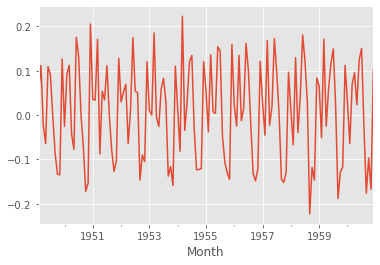

In [64]:
train['Pass_log']=np.log(train['Passengers'])
train['Passenger_log_diff']=train['Pass_log']-train['Pass_log'].shift(1)
train['Passenger_log_diff'].dropna().plot()

In [65]:
series=pd.read_csv('yearly-water-usage.csv',index_col=0)
series.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [67]:
series.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1885 to 1963
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Water   79 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [68]:
X=series.values

In [70]:
X=X.astype('float32')

In [72]:
train_size=int(len(X)*.50)
train,test=X[0:train_size],X[train_size:]

In [78]:
history=[x for x in train]
predictions=list()
for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('>predicted=',yhat,'Expected=',obs)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(test,predictions)
rmse=sqrt(mse)
print('RMSE:%.3f'%rmse)

>predicted= [492.] Expected= [503.]
>predicted= [503.] Expected= [503.]
>predicted= [503.] Expected= [450.]
>predicted= [450.] Expected= [432.]
>predicted= [432.] Expected= [432.]
>predicted= [432.] Expected= [458.]
>predicted= [458.] Expected= [462.]
>predicted= [462.] Expected= [503.]
>predicted= [503.] Expected= [488.]
>predicted= [488.] Expected= [466.]
>predicted= [466.] Expected= [492.]
>predicted= [492.] Expected= [503.]
>predicted= [503.] Expected= [515.]
>predicted= [515.] Expected= [500.]
>predicted= [500.] Expected= [522.]
>predicted= [522.] Expected= [575.]
>predicted= [575.] Expected= [583.]
>predicted= [583.] Expected= [587.]
>predicted= [587.] Expected= [628.]
>predicted= [628.] Expected= [640.]
>predicted= [640.] Expected= [609.]
>predicted= [609.] Expected= [606.]
>predicted= [606.] Expected= [632.]
>predicted= [632.] Expected= [617.]
>predicted= [617.] Expected= [613.]
>predicted= [613.] Expected= [598.]
>predicted= [598.] Expected= [575.]
>predicted= [575.] Expected=

In [88]:
from statsmodels.tsa.arima.model import ARIMA
series=pd.read_csv('yearly-water-usage.csv',index_col=0)

In [92]:
X=series.values
X=X.astype('float32')
train_size=int(len(X)*0.5)
train,test=X[0:train_size],X[train_size:]
history=[x for x in train]
predictions=list()
for i in range(len(test)):
    model=ARIMA(history,order=(0,1,0))
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('>predicted=%.3f,Expected=%3.f'%(yhat,obs))
    
mse=mean_squared_error(test,predictions)
rmse=sqrt(mse)
print('RMSE:%.3f'%rmse)

>predicted=492.000,Expected=503
>predicted=503.000,Expected=503
>predicted=503.000,Expected=450
>predicted=450.000,Expected=432
>predicted=432.000,Expected=432
>predicted=432.000,Expected=458
>predicted=458.000,Expected=462
>predicted=462.000,Expected=503
>predicted=503.000,Expected=488
>predicted=488.000,Expected=466
>predicted=466.000,Expected=492
>predicted=492.000,Expected=503
>predicted=503.000,Expected=515
>predicted=515.000,Expected=500
>predicted=500.000,Expected=522
>predicted=522.000,Expected=575
>predicted=575.000,Expected=583
>predicted=583.000,Expected=587
>predicted=587.000,Expected=628
>predicted=628.000,Expected=640
>predicted=640.000,Expected=609
>predicted=609.000,Expected=606
>predicted=606.000,Expected=632
>predicted=632.000,Expected=617
>predicted=617.000,Expected=613
>predicted=613.000,Expected=598
>predicted=598.000,Expected=575
>predicted=575.000,Expected=564
>predicted=564.000,Expected=549
>predicted=549.000,Expected=538
>predicted=538.000,Expected=568
>predict

In [95]:
def evaluated_arima_model(X,arima_order):
    X=X.astype('float32')
    train_size=int(len(X)*0.5)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse=mean_squared_error(test,predictions)
    rmse=sqrt(mse)
    return mse
def evaluate_models(dataset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None#inf=infinity
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluated_arima_model(dataset,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                        print('ARIMA% RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))
    
series=pd.read_csv('yearly-water-usage.csv',header=0,index_col=0)
p_values=range(0,5)
d_values=range(0,2)
q_values=range(0,5)
evaluate_models(series.values,p_values,d_values,q_values)  



Best ARIMA(2, 1, 0) RMSE=459.077


In [102]:
def evaluated_arima_model(X,arima_order):
    X=X.astype('float32')
    train_size=int(len(X)*0.5)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse=mean_squared_error(test,predictions)
    rmse=sqrt(mse)
    return mse
def evaluate_models(dataset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None#inf=infinity
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluated_arima_model(dataset,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                        print('ARIMA% RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))
    
series=pd.read_csv('yearly-water-usage.csv',header=0,index_col=0)
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)
evaluate_models(series.values,p_values,d_values,q_values)  

Best ARIMA(2, 2, 1) RMSE=458.519


In [108]:
import warnings

warnings.filterwarnings("ignore")
import statsmodels.api as smapi
series=pd.read_csv('yearly-water-usage.csv',header=0,index_col=0)
X=series.values
X=X.astype('float32')
model=ARIMA(X,order=(2,1,0))
model_fit=model.fit()
yhat=model_fit.forecast(steps=4,alpha=0.05)
print(yhat)

[608.4969812  609.56383891 610.0822387  609.99244614]


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,pacf,acf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('AirPassengers.csv')

In [4]:
df.sample(5)

,Month,#Passengers
27,1951-04,163
84,1956-01,284
78,1955-07,364
125,1959-06,472
47,1952-12,194


In [6]:
df['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [7]:
ts=df['#Passengers']

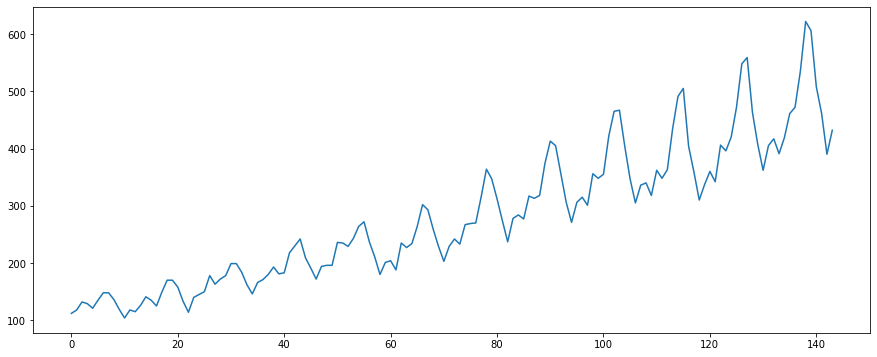

In [8]:
plt.plot(ts)

In [9]:
df['Month']=df['Month'].apply(lambda x:dt(int(x[:4]),int(x[5:]),15))

In [12]:
df=df.set_index('Month')

In [13]:
df

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121
...,...
1960-08-15,606
1960-09-15,508
1960-10-15,461


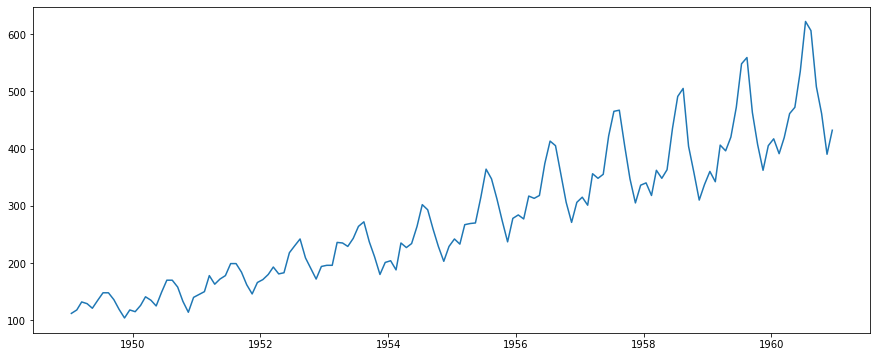

In [14]:
ts=df['#Passengers']
plt.plot(ts)

In [15]:
ts_log=np.log(ts)

In [16]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(rolmean,color='r',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & std')
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[:4],index=['Test-statistic','p-value','#Lags used',
                                          'Number of observations use'])
    for key,value in df_test[4].items():
        df_output['Critical value(%s)'%key]=value
    print(df_output)

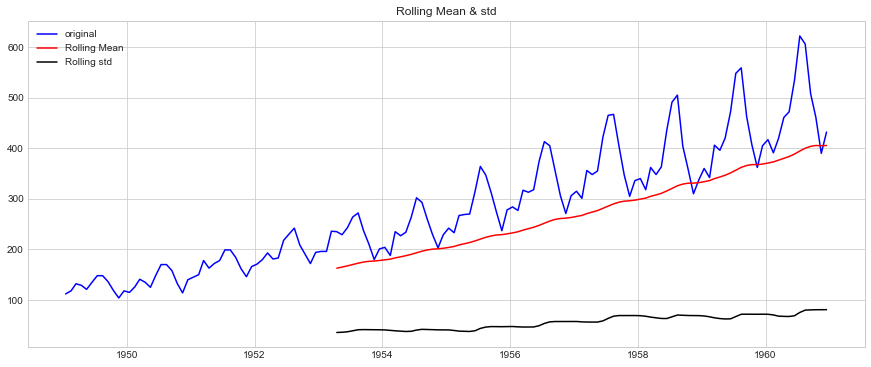

Results of dickey fuller test
Test-statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observations use    130.000000
Critical value(1%)             -3.481682
Critical value(5%)             -2.884042
Critical value(10%)            -2.578770
dtype: float64


In [20]:
from matplotlib import style
style.use('seaborn-whitegrid')
test_stationarity(df['#Passengers'])

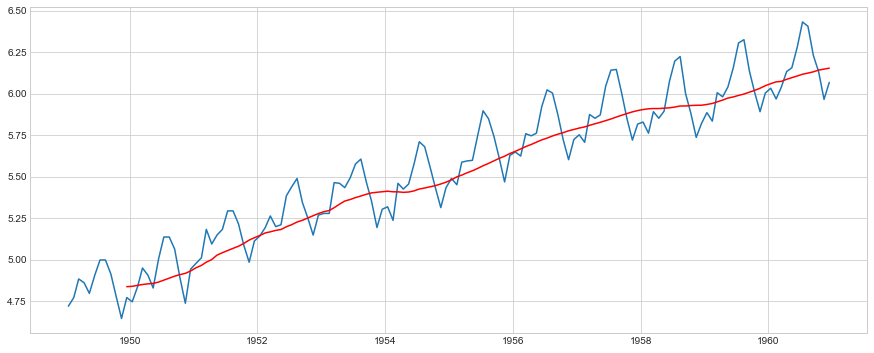

In [21]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='r')

In [24]:
ts_log_mv_diff=ts_log-movingAverage
ts_log_mv_diff.sample(5)
ts_log_mv_diff.dropna(inplace=True)
print(ts_log_mv_diff)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
                ...   
1960-08-15    0.282363
1960-09-15    0.098235
1960-10-15   -0.009230
1960-11-15   -0.182690
1960-12-15   -0.085789
Name: #Passengers, Length: 133, dtype: float64


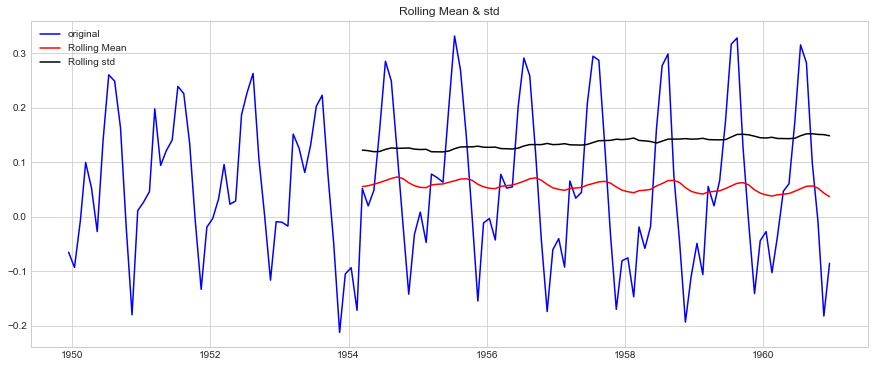

Results of dickey fuller test
Test-statistic                 -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of observations use    119.000000
Critical value(1%)             -3.486535
Critical value(5%)             -2.886151
Critical value(10%)            -2.579896
dtype: float64


In [25]:
test_stationarity(ts_log_mv_diff)

In [26]:
data=pd.read_csv('AirPassengers.csv')

In [27]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [29]:
data=data.set_index('Month')

In [31]:
ts=data['#Passengers']

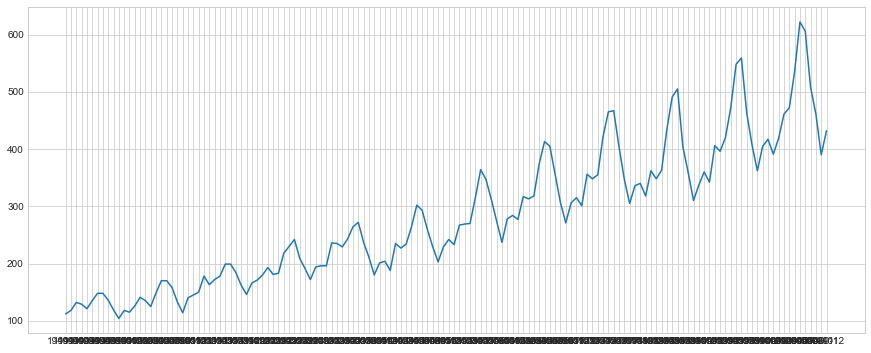

In [32]:
plt.plot(ts)

In [48]:
df_air=pd.read_csv('AirPassengers.csv')

In [49]:
df_air['Month']=df_air['Month'].apply(lambda x:dt(int(x[:4]),int(x[5:]),15))
df_air=df_air.set_index('Month')

In [50]:
df_air.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


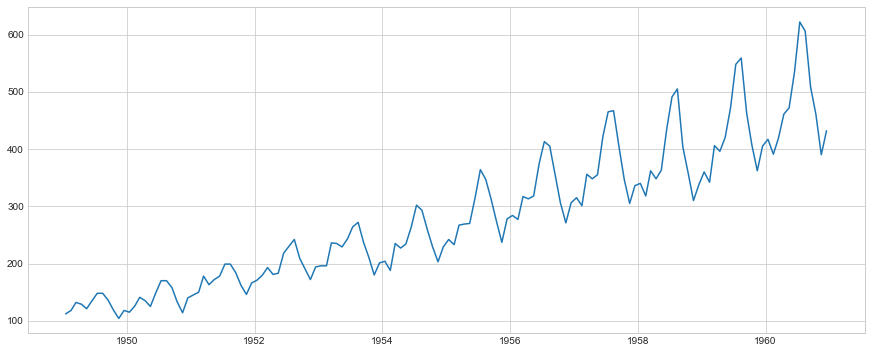

In [51]:
plt.plot(df_air)

In [52]:
ts=df_air['#Passengers']

In [53]:
ts_log=np.log(ts)

In [56]:
print(ts.head())
ts_log

Month
1949-01-15    112
1949-02-15    118
1949-03-15    132
1949-04-15    129
1949-05-15    121
Name: #Passengers, dtype: int64


Month
1949-01-15    4.718499
1949-02-15    4.770685
1949-03-15    4.882802
1949-04-15    4.859812
1949-05-15    4.795791
                ...   
1960-08-15    6.406880
1960-09-15    6.230481
1960-10-15    6.133398
1960-11-15    5.966147
1960-12-15    6.068426
Name: #Passengers, Length: 144, dtype: float64

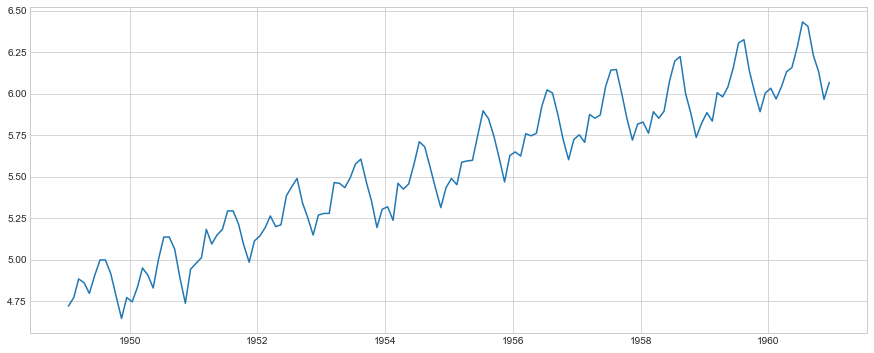

In [54]:
plt.plot(ts_log)

In [57]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(rolmean,color='r',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & std')
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[:4],index=['Test-statistic','p-value','#Lags used',
                                          'Number of observations use'])
    for key,value in df_test[4].items():
        df_output['Critical value(%s)'%key]=value
    print(df_output)

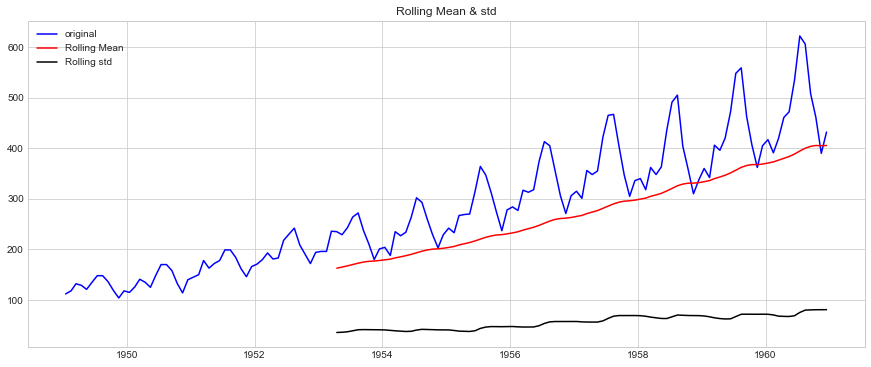

Results of dickey fuller test
Test-statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observations use    130.000000
Critical value(1%)             -3.481682
Critical value(5%)             -2.884042
Critical value(10%)            -2.578770
dtype: float64


In [58]:
test_stationarity(df_air['#Passengers'])

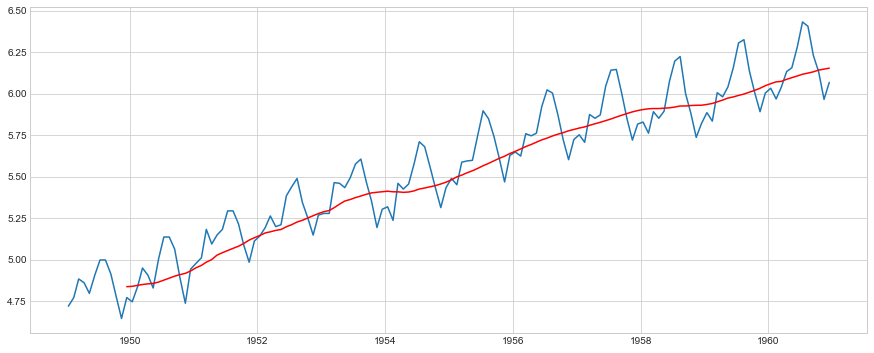

In [59]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='r')

In [60]:
ts_log_mv_diff=ts_log-movingAverage
ts_log_mv_diff.sample(5)
ts_log_mv_diff.dropna(inplace=True)
print(ts_log_mv_diff)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
                ...   
1960-08-15    0.282363
1960-09-15    0.098235
1960-10-15   -0.009230
1960-11-15   -0.182690
1960-12-15   -0.085789
Name: #Passengers, Length: 133, dtype: float64


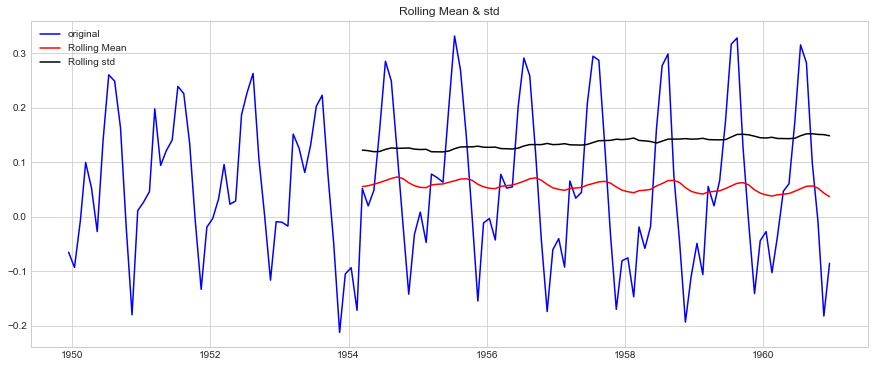

Results of dickey fuller test
Test-statistic                 -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of observations use    119.000000
Critical value(1%)             -3.486535
Critical value(5%)             -2.886151
Critical value(10%)            -2.579896
dtype: float64


In [61]:
test_stationarity(ts_log_mv_diff)

In [64]:
real=pd.read_csv('AirPassengers.csv')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

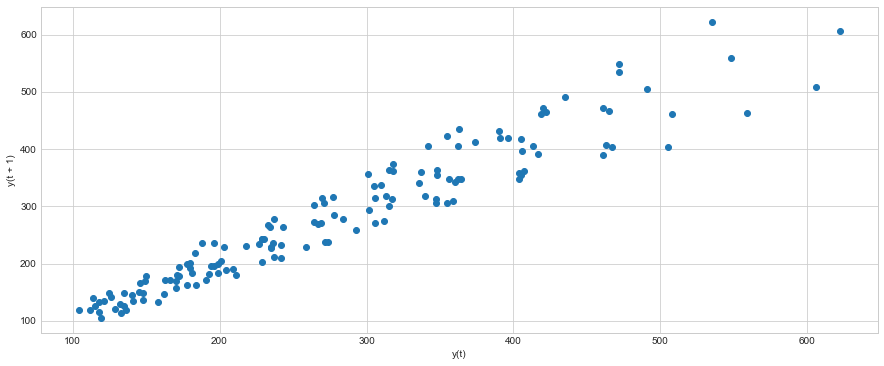

In [67]:
from pandas.plotting import lag_plot
lag_plot(df_air)

In [68]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

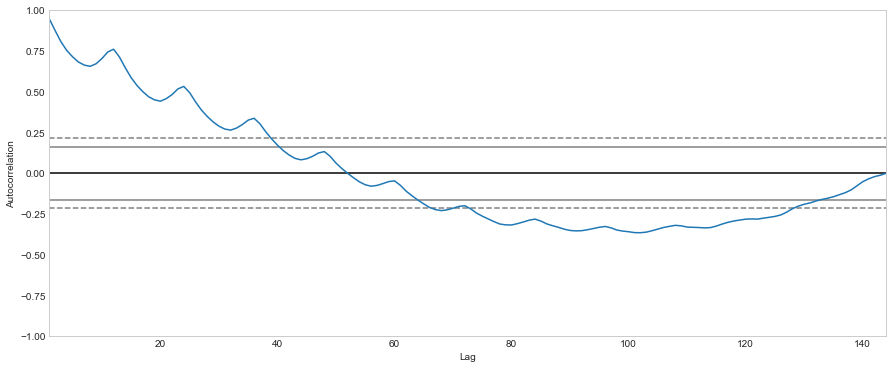

In [69]:
autocorrelation_plot(df_air)

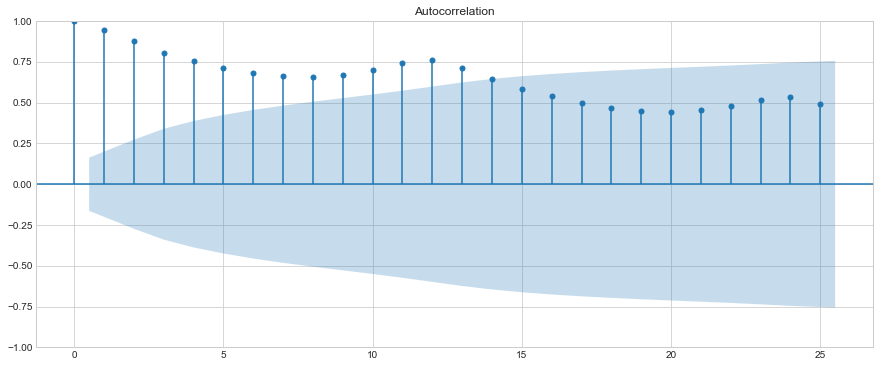

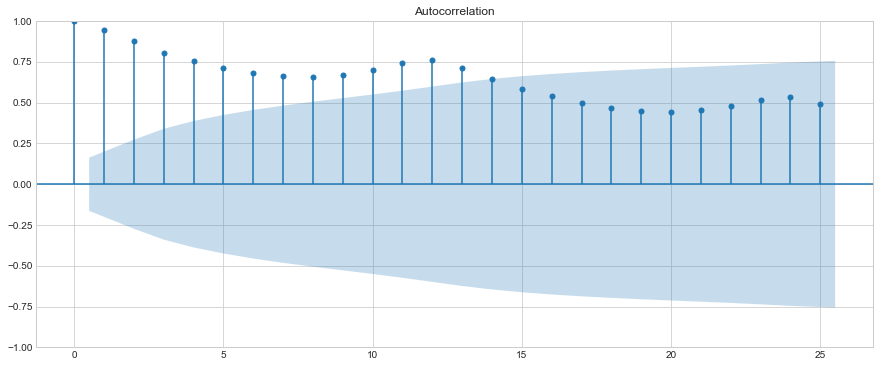

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_air,lags=25)

In [76]:
df_water=pd.read_csv('yearly-water-usage.csv',parse_dates=['Year'],index_col=['Year'])

In [77]:
df_water

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587
